In [1]:
import os
from collections import defaultdict

import networkx as nx
from gensim.corpora import Dictionary

In [2]:
spa_dictionary = Dictionary.load('../data/spa.dict')
syn_dictionary = Dictionary.load('../data/syn.dict')

In [3]:
FINAL = 30381
counter = 0

for i in range(246):
    for j in range(i + 1, 246):
        if counter % 100 == 0:
            print(f'{round((counter / FINAL) * 100, 2)}%')
            
        counter += 1

        """
        ###############################################################################################################
        """
        p1, p2 = str(i), str(j)

        p1_graph = nx.read_gpickle(f'../data/base_graphs/{p1}.gpickle')
        p2_graph = nx.read_gpickle(f'../data/base_graphs/{p2}.gpickle')

        """
        I really am only interested in the nodes that are shared across both poems. 
        If there is a term that doesn't exist between both, then I don't want it.
        """
        shared_spa_terms = defaultdict(set)
        shared_syn_terms = defaultdict(dict)

        for ind, graph in enumerate([p1_graph, p2_graph]):
            for node, data in graph.nodes(data=True):
                # really just want to see if this node appears in both
                if data['type'] == 'SYN':
                    if ind not in shared_syn_terms[node]:
                        shared_syn_terms[node][ind] = set()

                    for neighbor_node in graph.neighbors(node):
                        shared_syn_terms[node][ind].add(graph.node[neighbor_node]['term_id'])

                else:
                    shared_spa_terms[data['term_id']].add(ind)
        """
        ###############################################################################################################
        """
        direct_relationship_term_ids = set([term_id for term_id, ind_set in shared_spa_terms.items() if len(ind_set) > 1])

        # go ahead and include the data, we will know to include these
        shared_syn_nodes = dict()

        for node, ind_dict in shared_syn_terms.items():
            if len(ind_dict.keys()) == 2:
                ind_list = list()
                for ind, term_ids in ind_dict.items():
                    diff = term_ids.difference(direct_relationship_term_ids)

                    if term_ids.difference(direct_relationship_term_ids):
                        ind_list.append(ind)

                if len(ind_list) == 2:
                    shared_syn_nodes[node] = p1_graph.node[node]
        """
        ###############################################################################################################
        """
        """
        Now I want to actually create the graph. 
        Go through both graphs, adding the node if it is in the direct_relationship_term_ids, 
        but without edges at first.
        If the node is in the shared_syn_nodes, also add that node, and all of it's neighbors
        if the neighbor is NOT in the direct_relationship_term_ids set. 
        I don't want any of the direct_relationship_term_ids nodes to have edges associated 
        with the synonyms.
        """
        combined_graph = nx.Graph()
        combined_graph.add_nodes_from([(node, data) for node, data in shared_syn_nodes.items()])

        connected_term_node_ids = defaultdict(list)


        for ind, graph in enumerate([p1_graph, p2_graph]):
            for node, data in graph.nodes(data=True):
                if data['type'] == 'SPA' and data['term_id'] in direct_relationship_term_ids:
                    combined_graph.add_node(node, **data)

                    # I will go back and add edges at the end.
                    connected_term_node_ids[data['term_id']].append(node)

                if data['type'] == 'SYN' and node in shared_syn_nodes:
                    for neighbor_node in graph.neighbors(node):
                        if graph.node[neighbor_node]['term_id'] not in direct_relationship_term_ids:
                            combined_graph.add_node(neighbor_node, **graph.node[neighbor_node])

                            combined_graph.add_edge(
                                node,
                                neighbor_node
                            )
        """
        ###############################################################################################################
        """
        for edge_relationship in connected_term_node_ids.values():
            combined_graph.add_edge(*edge_relationship) 
        """
        ###############################################################################################################
        """
        nx.write_gpickle(combined_graph, f'../data/combined_graphs/{p1}/{p2}.gpickle')

0.0%
0.33%
0.66%
0.99%
1.32%
1.65%
1.97%
2.3%
2.63%
2.96%
3.29%
3.62%
3.95%
4.28%
4.61%
4.94%
5.27%
5.6%
5.92%
6.25%
6.58%
6.91%
7.24%
7.57%
7.9%
8.23%
8.56%
8.89%
9.22%
9.55%
9.87%
10.2%
10.53%
10.86%
11.19%
11.52%
11.85%
12.18%
12.51%
12.84%
13.17%
13.5%
13.82%
14.15%
14.48%
14.81%
15.14%
15.47%
15.8%
16.13%
16.46%
16.79%
17.12%
17.45%
17.77%
18.1%
18.43%
18.76%
19.09%
19.42%
19.75%
20.08%
20.41%
20.74%
21.07%
21.39%
21.72%
22.05%
22.38%
22.71%
23.04%
23.37%
23.7%
24.03%
24.36%
24.69%
25.02%
25.34%
25.67%
26.0%
26.33%
26.66%
26.99%
27.32%
27.65%
27.98%
28.31%
28.64%
28.97%
29.29%
29.62%
29.95%
30.28%
30.61%
30.94%
31.27%
31.6%
31.93%
32.26%
32.59%
32.92%
33.24%
33.57%
33.9%
34.23%
34.56%
34.89%
35.22%
35.55%
35.88%
36.21%
36.54%
36.87%
37.19%
37.52%
37.85%
38.18%
38.51%
38.84%
39.17%
39.5%
39.83%
40.16%
40.49%
40.81%
41.14%
41.47%
41.8%
42.13%
42.46%
42.79%
43.12%
43.45%
43.78%
44.11%
44.44%
44.76%
45.09%
45.42%
45.75%
46.08%
46.41%
46.74%
47.07%
47.4%
47.73%
48.06%
48.39%
48.71%
49.

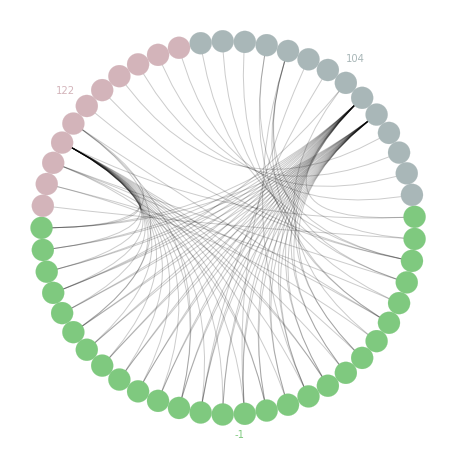

In [4]:
import nxviz as nv
import matplotlib.pyplot as plt

% matplotlib inline

ap = nv.CircosPlot(
    nx.read_gpickle(f'../data/combined_graphs/104/122.gpickle'), 
    node_color='doc_id', 
    node_order='doc_id', 
    node_grouping='doc_id', 
    group_label_position='middle',
    group_label_color=True,
    figsize=(8, 8)
)

ap.draw()
plt.show();